In [16]:
# from IPython.display import display, HTML
# display(HTML("""
#     <style>
#     .output_wrapper {

#     }
    
#     </style>
# """))

#         display: flex;
#         flex-direction: column;
#         justify-content: flex-end;
#         align-items: flex-end;
#         border: 1px solid gray;
#         width: 100%;

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from datetime import datetime
import missingno as msno

In [18]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 10)
sns.set_palette('RdBu')

## Ava - Unsupervised Learning Challenge

In [19]:
pd.read_csv('data/ava_USL_data.csv').cycle_day.describe()

count    20161.000000
mean        17.572293
std         18.588213
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max        300.000000
Name: cycle_day, dtype: float64

In [20]:
def clean_date(date):
    return datetime.strptime(date, '%Y-%m-%d')

In [21]:
def clean_ava_data(ava_):
    data = ava_.drop('Unnamed: 0', axis=1)
    
    data.first_date = data.first_date.apply(clean_date)
    data.last_date = data.last_date.apply(clean_date)
    data.date = data.date.apply(clean_date)
    
    data = data.dropna()
    return data

In [22]:
ava = clean_ava_data(pd.read_csv("data/ava_USL_data.csv"))

In [23]:
ava.head()

user first_date  last_date  cycle_number  cycle_length       date  \
0   359 2016-11-12 2016-12-06             1            25 2016-11-12   
1   359 2016-11-12 2016-12-06             1            25 2016-11-13   
2   359 2016-11-12 2016-12-06             1            25 2016-11-14   
3   359 2016-11-12 2016-12-06             1            25 2016-11-15   
4   359 2016-11-12 2016-12-06             1            25 2016-11-16   

   cycle_day  skin_temperature         hr         br  
0          1             36.11  68.375941  16.081958  
1          2             35.70  67.499289  15.681856  
2          3             35.38  63.632920  15.381588  
3          4             35.64  66.366427  15.448914  
4          5             35.87  66.680990  15.823407

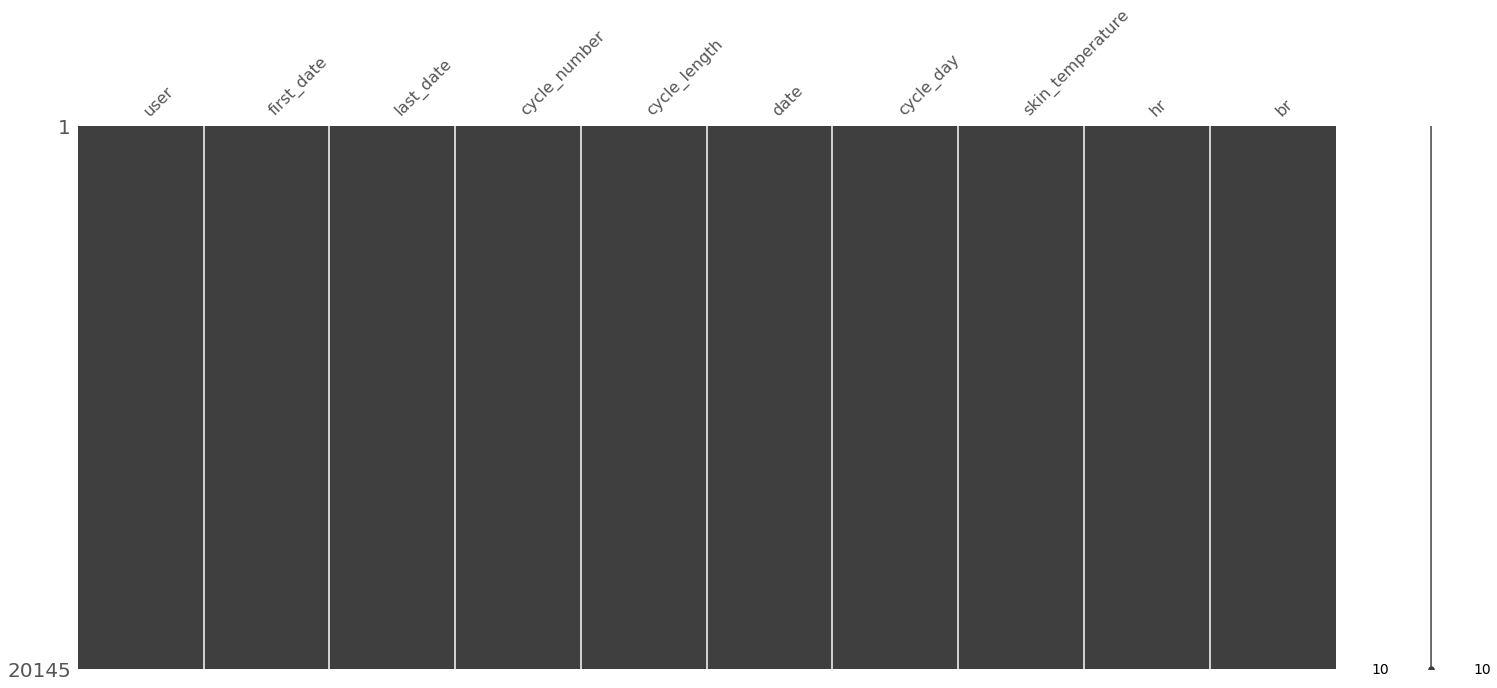

In [24]:
msno.matrix(ava) # matrix is clean -> no nan's
None

---

### Exploration

In [25]:
features = ['cycle_number', 'cycle_length', 'cycle_day', 'skin_temperature', 'hr', 'br']
time_features = ['cycle_number', 'cycle_length', 'cycle_day']
phys_features = ['skin_temperature', 'hr', 'br']

In [26]:
# clustergrid = sns.clustermap(ava[features], metric='correlation', figsize=(16,12))

In [27]:
 def plot_correlation_matrix(df):
    fig, ax = plt.subplots(figsize=(16,12))
    mat = ax.matshow(df.corr(), cmap=plt.cm.RdBu)

    fig.colorbar(mat)

    ticks = range(len(df.columns))
    ax.set_xticks(ticks)
    ax.set_xticklabels(df.columns, 
                       rotation=50, 
                       horizontalalignment = 'left', 
                       verticalalignment='bottom')

    ax.set_yticks(ticks)
    ax.set_yticklabels(df.columns, 
                       rotation=0, 
                       horizontalalignment = 'right', 
                       verticalalignment='bottom')
    None

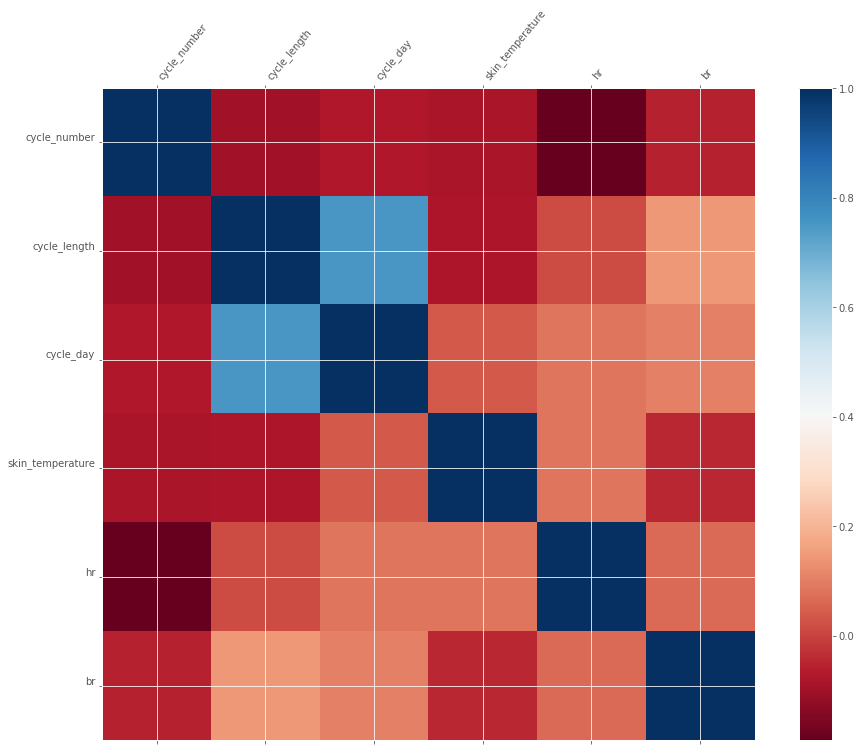

In [28]:
plot_correlation_matrix(ava[features])

In [29]:
# g = sns.pairplot(ava[features], kind='reg', diag_kind='kde',
#                 plot_kws=dict(marker="+"))

In [30]:
ava_cycle_length = ava.groupby('cycle_length').mean()

In [31]:
cycles_under_50 = ava.cycle_length[ava.cycle_length < 50]
y, x, _ = plt.hist(cycles_under_50, bins=20)
plt.vlines(np.mean(cycles_under_50), ymin=min(y), ymax=max(y))
None

In [32]:
# ava_cycle_length[phys_features].plot()
# plt.legend(bbox_to_anchor=(1,1))
# plt.ylabel('Rate and Temperature (C)')
# None

In [33]:
# in_range = lambda cycle: (cycle > 22) & (cycle < 34)

# ava_sub_cycle_length = ava_cycle_length[phys_features].reset_index()
# ava_sub_cycle_length = ava_sub_cycle_length[in_range(ava_sub_cycle_length.cycle_length)].set_index('cycle_length')

In [34]:
# ava_sub_cycle_length.plot()
# plt.legend(bbox_to_anchor=(1,1))
# plt.ylabel('Rate and Temperature (C)')
# None

In [35]:
# ava_cycles_group = ava.groupby('cycle_number')[phys_features]

In [36]:
# fig, ax = plt.subplots()
# ava_cycles_group.median().plot(ax=ax)
# ava_cycles_group.mean().plot(ax=ax, legend=None)
# plt.ylabel('Rate and Temperature (C)')
# plt.title('Median/Mean Rates/Temperature per cycle number')
# plt.legend(bbox_to_anchor=(1,1))
# None

---

### Goal 1: Identify cyclic patterns using clustering in time-series data from AVA woman.

#### *Hints:*

#### *With the time-series data provided by AVA women. Use your understanding from the statistics week to generate a matrix representing cycles in rows and signal values in columns.*
#### *Perform hierarchical and/or k-means clustering using this data (try one method, visualize, try again, visualize and try again and so on…)*
#### *Perform manual cluster classification.*

### Goal 2: Identify the impact of data removal (beginning, middle and last days of cycle) on cluster stability.

#### *Hints:*

#### *Finalize the best combination of distance + clustering method from goal 1.*
#### *Class discussion - How do we do it? Can we benchmark this?*

---

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering as Agg, MiniBatchKMeans

In [38]:
mean_hr = np.mean(ava.hr)
std_hr = np.std(ava.hr)
mean_br = np.mean(ava.br)
std_br = np.std(ava.br)
mean_temp = np.mean(ava.skin_temperature)
std_temp = np.std(ava.skin_temperature)

#z-score normalization
ava_norm = ava.assign(norm_hr = ava.hr.apply(lambda x: (x - mean_hr)/std_hr),
                      norm_br = ava.br.apply(lambda x: (x - mean_br)/std_br),
                      norm_skin_temperature = ava.skin_temperature.apply(lambda x: (x - mean_temp)/std_temp))

In [39]:
# giving unique ids to each cycle
global_cycle_count = 1
global_current_cycle = 1
def increment_cycle(cycle_number_):
    global global_current_cycle
    global global_cycle_count
    if cycle_number_ != global_current_cycle:
        global_cycle_count += 1
        global_current_cycle = cycle_number_
        
    return global_cycle_count

In [40]:
ava_norm = ava_norm.assign(cycle_id = ava_norm.cycle_number.apply(increment_cycle))

In [41]:
norm_features = ['norm_' + col for col in phys_features]

In [42]:
in_range = lambda cycle: (cycle > 24) & (cycle < 29)
# has_28_days = lambda cycle: cycle == 28

user_cycles = ava_norm[in_range(ava_norm.cycle_length)].groupby(['user', 'cycle_id']+time_features).mean()

In [43]:
cycle_days = user_cycles.reset_index('cycle_day').reset_index(drop=True)

In [44]:
sns.lineplot(data=cycle_days.set_index('cycle_day')['norm_hr'])
plt.title("Heart Rate per Cycle Day over all cycles")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Heart Rate")
None

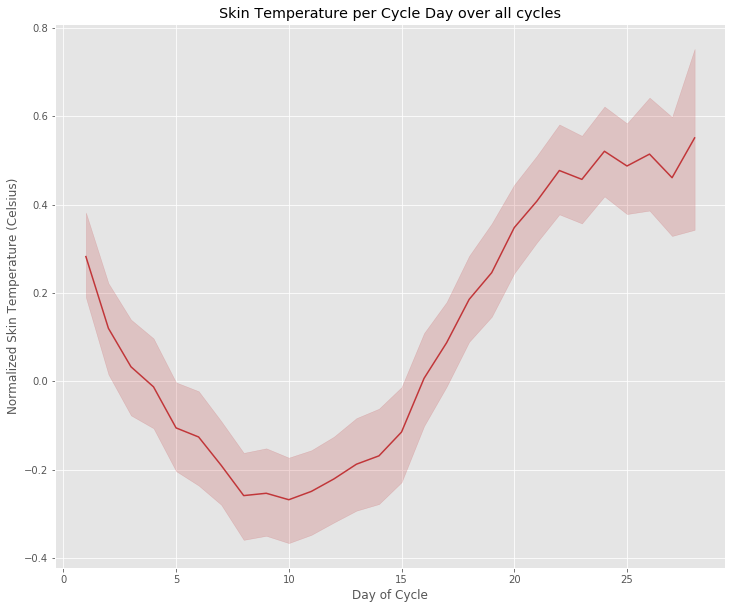

In [45]:
sns.lineplot(data = cycle_days.set_index('cycle_day')['norm_skin_temperature'])
plt.title("Skin Temperature per Cycle Day over all cycles")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Skin Temperature (Celsius)")
None

In [46]:
sns.lineplot(data = cycle_days.set_index('cycle_day')['norm_br'])
plt.title("Breathing Rate per Cycle Day over all cycles")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Breathing Rate")
None

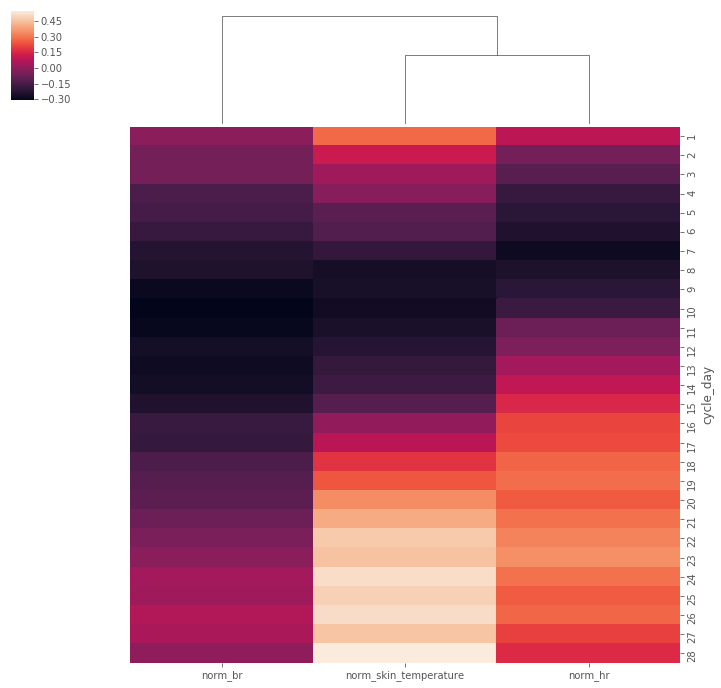

In [47]:
g = sns.clustermap(
        data = cycle_days
                .groupby('cycle_day').mean()[norm_features],
        row_cluster=False,
        figsize=(12,12)
)

In [48]:
g = sns.clustermap(
    data = cycle_days.groupby('cycle_day').mean()[norm_features].T,
    metric='correlation',
    row_cluster=False,
    figsize=(12,12)
)

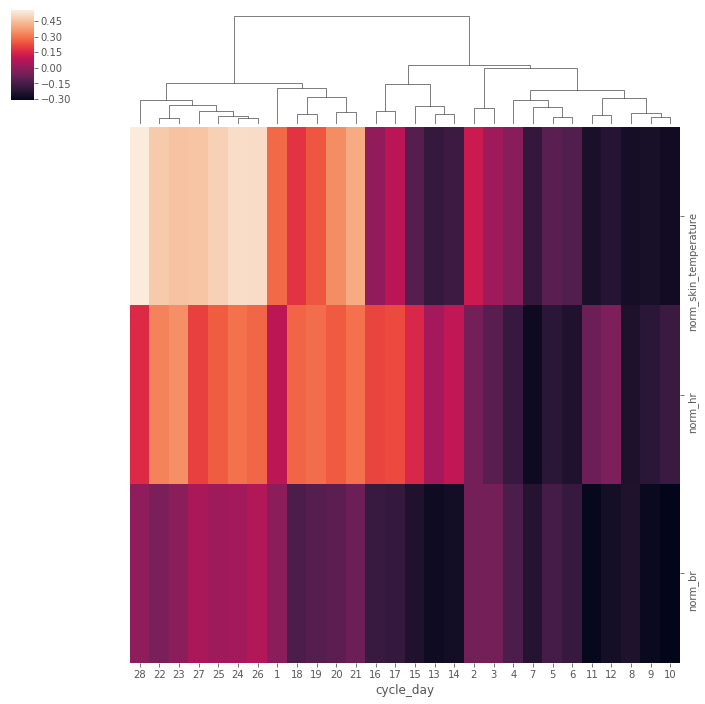

In [49]:
g = sns.clustermap(
    data = cycle_days.groupby('cycle_day').mean()[norm_features].T,
    metric='euclidean',
    row_cluster=False,
    figsize=(12,12)
)

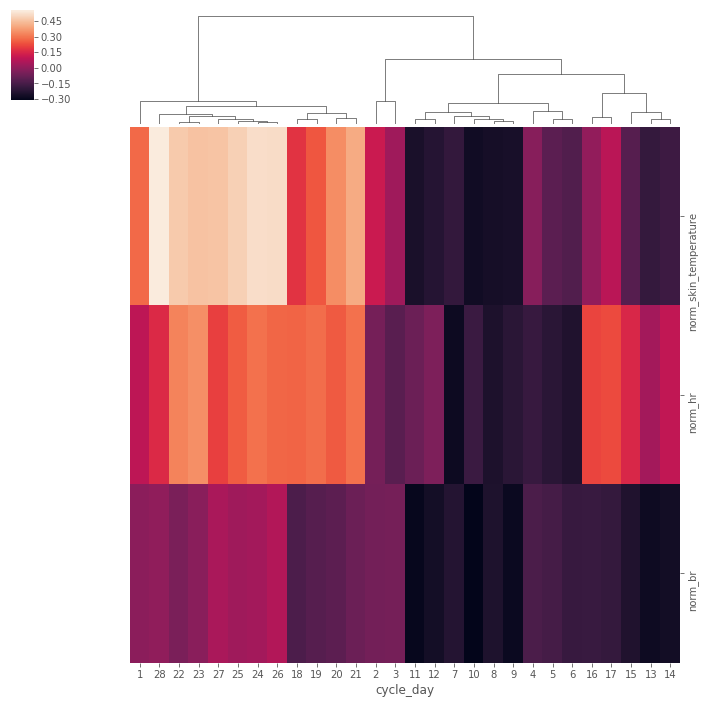

In [50]:
cycle_days_bc = sns.clustermap(
                data = cycle_days.groupby('cycle_day').mean()[norm_features].T,
                    metric='braycurtis',
                row_cluster=False,
                figsize=(12,12)
            )

In [51]:
def kmeans_elbow(data_, n_clusters):
    
    elbows_ = list()
    cluster_vals = range(1,n_clusters+1)
    for i in cluster_vals:
        elbows_.append(KMeans(i).fit(data_).inertia_)
        
    print(elbows_)

    return elbows_

In [52]:
el_user_cycles = kmeans_elbow(user_cycles[norm_features], 10)

[22387.331756730822, 16188.907528085962, 13291.672246567177, 11061.38894801799, 9680.704654465233, 8630.980987096465, 7760.409090439514, 7113.4975570601655, 6551.209236200295, 6084.278477653556]


In [53]:
fig, ax = plt.subplots()
ax.plot(range(1,len(el_user_cycles)+1), el_user_cycles, marker='x')
plt.title("Elbow Plot - KMeans Inertia per 'n' clusters")
plt.xlabel("Number of clusters")
plt.ylabel("KMeans Inertia")
None

In [54]:
agg = Agg(n_clusters=3, linkage='ward')

agg.fit(user_cycles[norm_features])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000000EFA4AAB840>)

In [55]:
km = KMeans(n_clusters=4)

km.fit(user_cycles[norm_features])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
miniKm = MiniBatchKMeans(4)

miniKm.fit(user_cycles[norm_features])

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [57]:
user_cycles_cluster = user_cycles.assign(agg = agg.labels_)

In [58]:
user_cycles_cluster = user_cycles_cluster.assign(km = km.labels_)

In [59]:
user_cycles_cluster = user_cycles_cluster.assign(miniKm = miniKm.labels_)

In [60]:
user_cycles_cluster.head()

skin_temperature  \
user cycle_id cycle_number cycle_length cycle_day                     
359  1        1            25           1                     36.11   
                                        2                     35.70   
                                        3                     35.38   
                                        4                     35.64   
                                        5                     35.87   

                                                          hr         br  \
user cycle_id cycle_number cycle_length cycle_day                         
359  1        1            25           1          68.375941  16.081958   
                                        2          67.499289  15.681856   
                                        3          63.632920  15.381588   
                                        4          66.366427  15.448914   
                                        5          66.680990  15.823407   

                                                    norm_br   norm_hr  \
user cycle_id cycle_number cycle_length cycle_day                       
359  1        1            25           1          0.243237  2.083724   
                                        2          0.032189  1.940591   
                                        3         -0.126198  1.309322   
                                        4         -0.090685  1.755626   
                                        5          0.106855  1.806986   

                                                   norm_skin_temperature  agg  \
user cycle_id cycle_number cycle_length cycle_day                               
359  1        1            25           1                       1.163085    0   
                                        2                       0.551839    0   
                                        3                       0.074769    1   
                                        4                       0.462388    0   
                                        5                       0.805282    0   

                                                   km  miniKm  
user cycle_id cycle_number cycle_length cycle_day              
359  1        1            25           1           0       1  
                                        2           0       1  
                                        3           0       1  
                                        4           0       1  
                                        5           0       1

In [61]:
g = sns.scatterplot('norm_hr', 'norm_br', data=user_cycles_cluster, hue='agg', palette="RdBu")

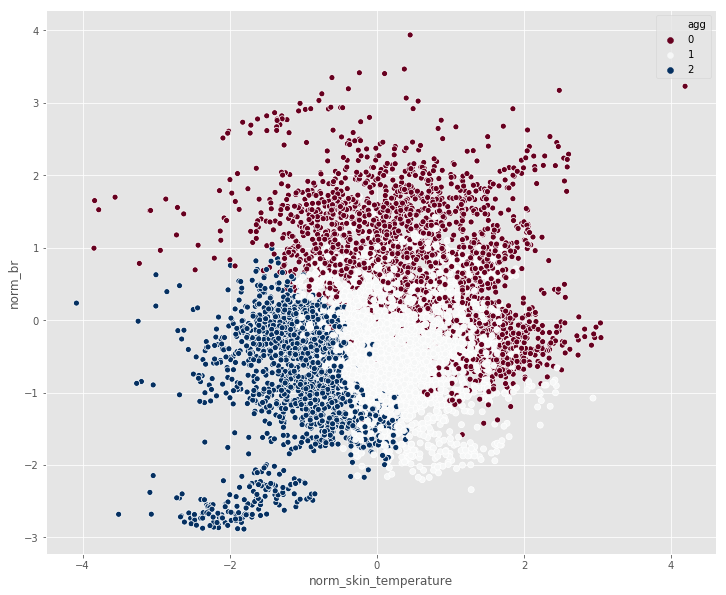

In [62]:
g = sns.scatterplot('norm_skin_temperature', 'norm_br', data=user_cycles_cluster, hue='agg', palette="RdBu")

In [63]:
g = sns.scatterplot('norm_hr', 'norm_br', data=user_cycles_cluster, 
                    hue='miniKm', 
                    palette='RdBu')

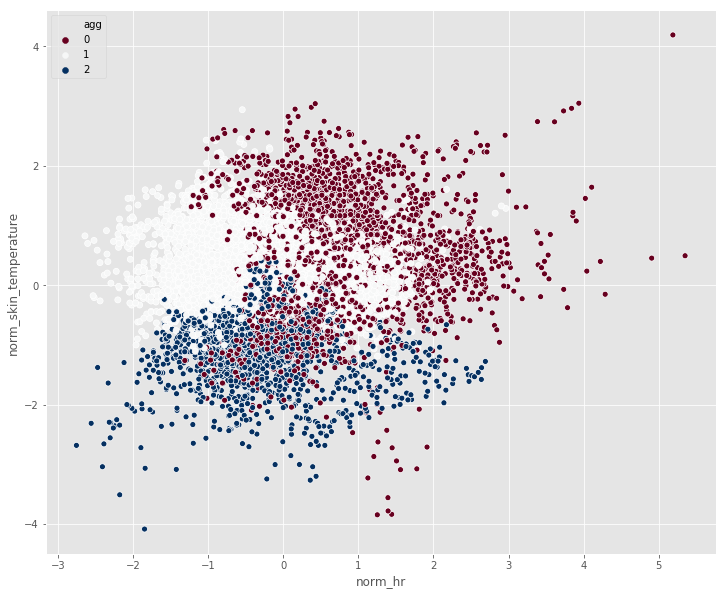

In [64]:
g = sns.scatterplot('norm_hr', 'norm_skin_temperature', data=user_cycles_cluster, 
                    hue='agg', 
                    palette='RdBu')

In [65]:
g = sns.scatterplot('norm_hr', 'norm_skin_temperature', data=user_cycles_cluster, 
                    hue='miniKm', 
                    palette='RdBu')

---

In [66]:
g = sns.clustermap(
        data = user_cycles_cluster[user_cycles_cluster['agg'] == 0]
                .reset_index('cycle_day')
                .groupby('cycle_day')
                .mean()[norm_features].T,
        metric='correlation',
        col_cluster=False,
        figsize=(12,12)
)

In [67]:
g = sns.clustermap(
        data = user_cycles_cluster[user_cycles_cluster['agg'] == 0]
                .reset_index('cycle_day')
                .groupby('cycle_day')
                .mean()[norm_features].T,
        metric='correlation',
        figsize=(12,12)
)

In [68]:
g = sns.clustermap(
        data = user_cycles_cluster[user_cycles_cluster['agg'] == 1]
                .reset_index('cycle_day')
                .groupby('cycle_day')
                .mean()[norm_features].T,
        metric='correlation',
        col_cluster=False,
        figsize=(12,12)
)

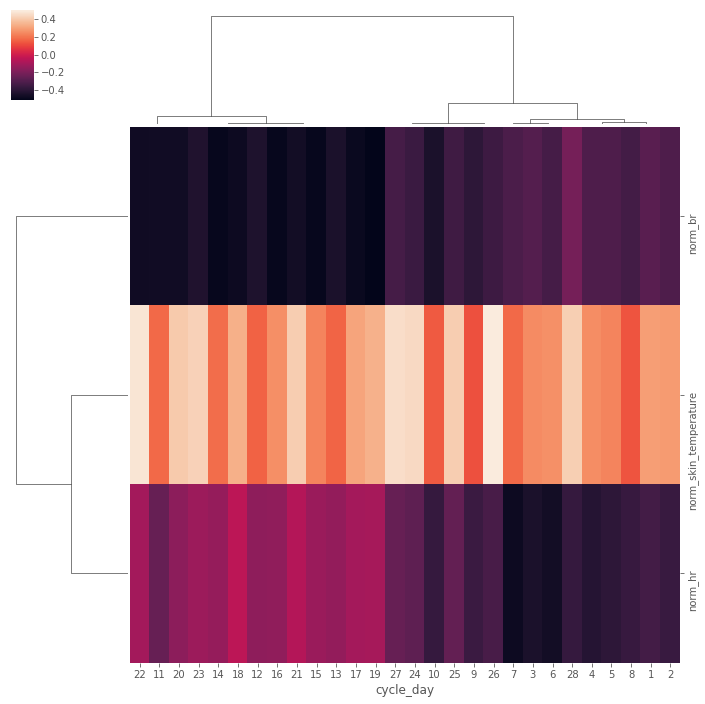

In [69]:
g = sns.clustermap(
        data = user_cycles_cluster[user_cycles_cluster['agg'] == 1]
                .reset_index('cycle_day')
                .groupby('cycle_day')
                .mean()[norm_features].T,
        metric='correlation',
        figsize=(12,12)
)

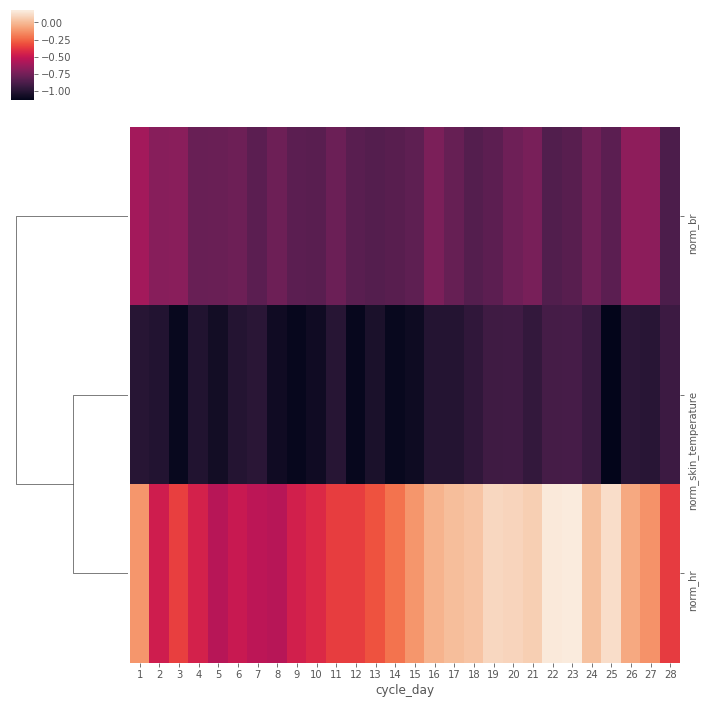

In [70]:
g = sns.clustermap(
        data = user_cycles_cluster[user_cycles_cluster['agg'] == 2]
                .reset_index('cycle_day')
                .groupby('cycle_day')
                .mean()[norm_features].T,
        metric='correlation',
        col_cluster=False,
        figsize=(12,12)
)

In [71]:
g = sns.clustermap(
        data = user_cycles_cluster[user_cycles_cluster['agg'] == 2]
                .reset_index('cycle_day')
                .groupby('cycle_day')
                .mean()[norm_features].T,
        metric='correlation',
        figsize=(12,12)
)

In [72]:
cycle_day_df = user_cycles_cluster.reset_index('cycle_day').reset_index(drop=True)

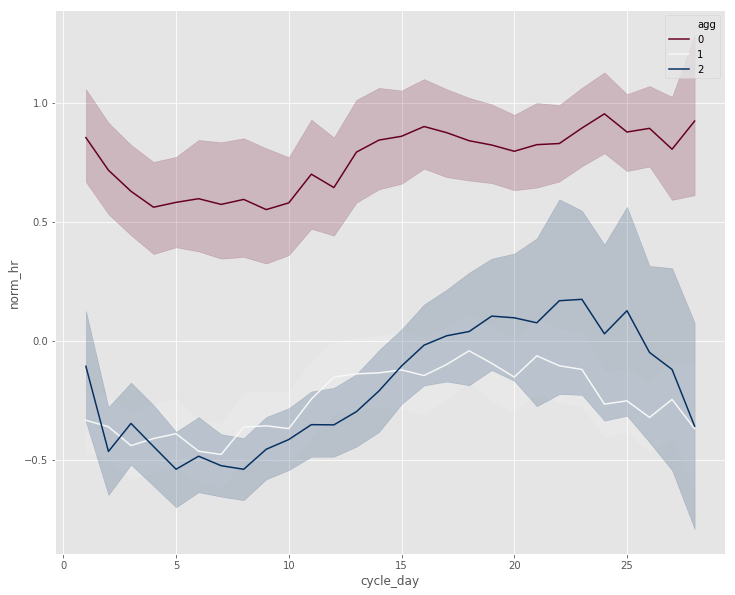

In [73]:
g = sns.lineplot(x = cycle_day_df['cycle_day'],
                 y = cycle_day_df['norm_hr'],
                 hue = cycle_day_df['agg'], 
                 legend = 'full',
                 palette = "RdBu")

In [74]:
g = sns.lineplot(x = cycle_day_df['cycle_day'],
                 y = cycle_day_df['norm_hr'],
                 hue = cycle_day_df['miniKm'], 
                 legend = 'full',
                 palette = "RdBu")

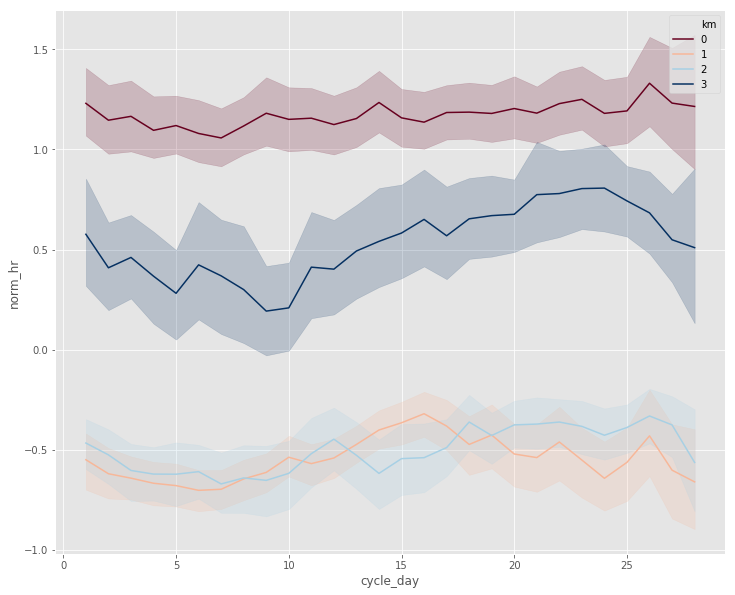

In [75]:
g = sns.lineplot(x = cycle_day_df['cycle_day'],
                 y = cycle_day_df['norm_hr'],
                 hue = cycle_day_df['km'], 
                 legend = 'full',
                 palette = "RdBu")

---

### Group Rows and physiological attributes with days as 'features'

In [180]:
def group_attributes_day_number(data_, col_):
    grp_df = data_.reset_index(['cycle_id', 'user', 'cycle_number', 'cycle_day']).reset_index(drop=True)
    piv_df = grp_df.pivot_table(index='cycle_id',
                                columns='cycle_day',
                                values=col_)
    piv_df = piv_df.interpolate('nearest', axis=0)
    return piv_df.dropna(how='any', axis=0)

In [181]:
cycle_day_number = user_cycles.reset_index(['cycle_id', 'user', 'cycle_number', 'cycle_day']).reset_index(drop=True)

In [182]:
cycle_day_hr = cycle_day_number.pivot_table(index='cycle_id',
                             columns='cycle_day',
                             values='norm_hr')

In [183]:
cycle_day_hr = cycle_day_hr.interpolate('nearest', axis=0)
cycle_day_hr = cycle_day_hr.dropna(how='any', axis=0)

In [184]:
cycle_day_hr.shape

(331, 28)

In [140]:
# cycle_day_hr = group_attributes_day_number(user_cycles, 'norm_hr')

In [185]:
cycle_day_hr = cycle_day_hr.join(cycle_day_number.user).reset_index().set_index(['cycle_id', 'user'])

In [186]:
el_day_hr = kmeans_elbow(cycle_day_hr, 10)

[8126.371238239613, 4210.88965602483, 2894.5390430351536, 2492.6450199109076, 2280.0865305164707, 2117.4985662114223, 2013.5366587825426, 1941.5626195776554, 1860.8411405750576, 1800.4145173407599]


In [187]:
pd.DataFrame(el_day_hr).plot(marker='o')
None

In [188]:
km_day_hr = KMeans(3)

km_day_hr.fit(cycle_day_hr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [189]:
cycle_day_hr = cycle_day_hr.assign(km_hr = km_day_hr.labels_.astype(int))

In [190]:
cycle_day_hr.sample(5)

1         2         3         4         5         6  \
cycle_id user                                                               
273      407  -0.039617 -0.146493 -0.238551 -0.395865 -0.336112 -0.406750   
503      412  -1.336167 -1.482588 -1.676958 -1.833758 -1.544911 -1.485822   
717      418  -0.200701 -0.129965  0.721262 -0.588032 -0.522883 -0.738721   
305      407   0.512135  0.445571  0.090185 -0.110559 -0.032931  0.177463   
448      411   0.712570  0.748116  0.650168  0.584348  0.312645  0.445161   

                      7         8         9        10  ...          20  \
cycle_id user                                          ...               
273      407  -0.396751 -0.381842 -0.274561 -0.179012  ...    0.878633   
503      412  -1.428866 -1.359666 -1.170123 -1.140525  ...   -1.148517   
717      418  -0.326227 -0.085057  0.052158 -0.107184  ...    0.388562   
305      407  -0.176486 -0.674446  0.221659 -0.387724  ...    0.655282   
448      411   0.455612  0.679191  0.592792  0.555667  ...    0.073494   

                     21        22        23        24        25        26  \
cycle_id user                                                               
273      407   0.889077  0.981966  1.017691  0.940376  0.989554  1.071282   
503      412  -1.306384 -1.470080 -1.455805 -1.411967 -1.361227 -1.343299   
717      418   0.172863  0.413177  0.284659  0.618104  0.459769  0.421979   
305      407   0.440814  0.357991  1.041779  0.878307  0.824226  0.716079   
448      411   0.919504  1.070443  0.884875  0.704594  0.430418  0.231828   

                     27        28  km_hr  
cycle_id user                             
273      407   0.798624  1.740791      0  
503      412  -1.219750 -1.173773      1  
717      418   0.444913 -0.438099      0  
305      407   0.627316  4.107651      0  
448      411   0.465652  1.093312      0  

[5 rows x 29 columns]

In [191]:
cycle_day_number.head()

user  cycle_id  cycle_number  cycle_day  skin_temperature         hr  \
0   359         1             1          1             36.11  68.375941   
1   359         1             1          2             35.70  67.499289   
2   359         1             1          3             35.38  63.632920   
3   359         1             1          4             35.64  66.366427   
4   359         1             1          5             35.87  66.680990   

          br   norm_br   norm_hr  norm_skin_temperature  
0  16.081958  0.243237  2.083724               1.163085  
1  15.681856  0.032189  1.940591               0.551839  
2  15.381588 -0.126198  1.309322               0.074769  
3  15.448914 -0.090685  1.755626               0.462388  
4  15.823407  0.106855  1.806986               0.805282

In [192]:
cycle_hr_cluster = cycle_day_number.merge(pd.DataFrame(cycle_day_hr.km_hr), on='cycle_id')

In [193]:
sns.lineplot(data=cycle_hr_cluster,
             x = 'cycle_day',
             y = 'norm_hr',
             hue = 'km_hr',
             palette = 'RdBu')
None

In [194]:
cycle_day_br = group_attributes_day_number(user_cycles, 'norm_br')

In [195]:
cycle_day_br = cycle_day_br.join(cycle_day_number.user).reset_index().set_index(['cycle_id', 'user'])

In [196]:
el_day_br = kmeans_elbow(cycle_day_br, 10)

[7324.012650452007, 3714.4524541797473, 2566.0745279850144, 2048.333437638537, 1745.9202537194083, 1552.643854188363, 1430.7472463806423, 1332.1722737340147, 1267.703351833321, 1224.34156147469]


In [197]:
pd.DataFrame(el_day_br).plot(marker='o')

In [198]:
km_day_br = KMeans(3)

km_day_br.fit(cycle_day_br)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [199]:
cycle_day_br = cycle_day_br.assign(km_br = km_day_br.labels_.astype(int))

In [200]:
cycle_br_cluster = cycle_day_number.merge(pd.DataFrame(cycle_day_br.km_br), on='cycle_id')

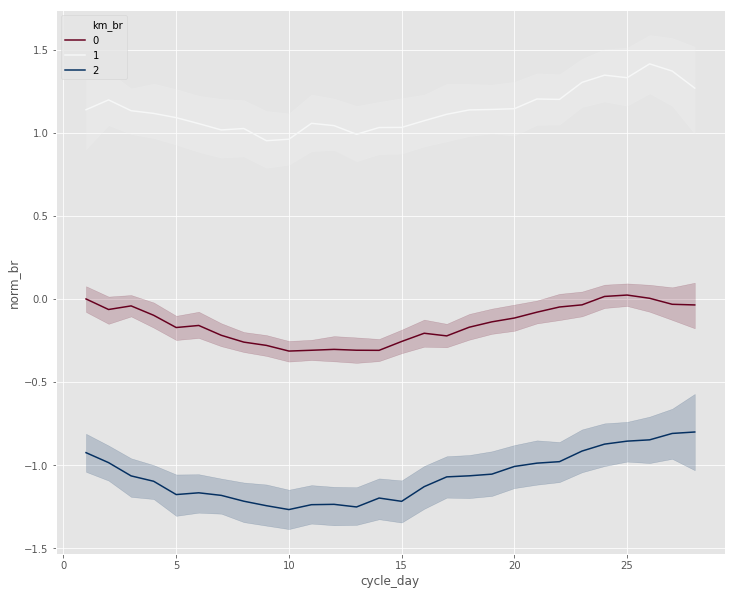

In [201]:
sns.lineplot(data=cycle_br_cluster,
             x = 'cycle_day',
             y = 'norm_br',
             hue = 'km_br',
             palette = 'RdBu')

---

### Perform clustering on atypical cycle lengths

In [ ]:
less_range = lambda length: length < 24
more_range = lambda length: length > 29

user_cycles_less = ava_norm[less_range(ava_norm.cycle_length)].groupby(['user']+time_features).mean()
user_cycles_less = user_cycles_less.assign(less_more = ['less' for _ in user_cycles_less.index.values])
user_cycles_more = ava_norm[more_range(ava_norm.cycle_length)].groupby(['user']+time_features).mean()
user_cycles_more = user_cycles_more.assign(less_more = ['more' for _ in user_cycles_more.index.values])

In [ ]:
user_cycles_out = user_cycles_less.append(user_cycles_more)

In [ ]:
cycle_days_out = user_cycles_out.reset_index('cycle_day').reset_index(drop=True)

In [ ]:
sns.lineplot(x = 'cycle_day',
             y = 'norm_hr',
             data=cycle_days_out,
             hue='less_more')
plt.title("Heart Rate per Cycle Day")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Heart Rate")
None

In [ ]:
sns.lineplot(x = 'cycle_day',
             y = 'norm_br',
             data=cycle_days_out,
             hue='less_more')
plt.title("Breating Rate per Cycle Day")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Breating Rate")
None

In [ ]:
sns.lineplot(x = 'cycle_day',
             y = 'norm_skin_temperature',
             data=cycle_days_out,
             hue='less_more')
plt.title("Skin Temperature per Cycle Day")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Skin Temperature (Celsius)")
None

In [ ]:
less_range = lambda length: length < 24
more_range = lambda length: (length > 29) & (length < 50)

user_cycles_less = ava_norm[less_range(ava_norm.cycle_length)].groupby(['user']+time_features).mean()
user_cycles_less = user_cycles_less.assign(less_more = ['less' for _ in user_cycles_less.index.values])
user_cycles_more = ava_norm[more_range(ava_norm.cycle_length)].groupby(['user']+time_features).mean()
user_cycles_more = user_cycles_more.assign(less_more = ['more' for _ in user_cycles_more.index.values])

user_cycles_out = user_cycles_less.append(user_cycles_more)

cycle_days_out = user_cycles_out.reset_index('cycle_day').reset_index(drop=True)

In [ ]:
cycle_days_out.head()

In [ ]:
plot_correlation_matrix(user_cycles_out.reset_index()[time_features + norm_features])

In [ ]:
sns.lineplot(x = 'cycle_day',
             y = 'norm_hr',
             data=cycle_days_out,
             hue='less_more')
plt.title("Heart Rate per Cycle Day")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Heart Rate")
None

In [ ]:
sns.lineplot(x = 'cycle_day',
             y = 'norm_br',
             data=cycle_days_out,
             hue='less_more')
plt.title("Breating Rate per Cycle Day")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Breating Rate")
None

In [ ]:
sns.lineplot(x = 'cycle_day',
             y = 'norm_skin_temperature',
             data=cycle_days_out,
             hue='less_more')
plt.title("Skin Temperature per Cycle Day")
plt.xlabel("Day of Cycle")
plt.ylabel("Normalized Skin Temperature (Celsius)")
None

---

In [ ]:
g = sns.clustermap(
        data = cycle_days_out
                .groupby('cycle_day').mean()[norm_features],
        metric='correlation',
        row_cluster=False,
        figsize=(12,12)
)

In [ ]:
g = sns.clustermap(
        data = cycle_days_out
                .groupby('cycle_day').mean()[norm_features].T,
        metric='correlation',
        row_cluster=False,
        figsize=(12,12)
)

In [ ]:
g = sns.clustermap(
        data = cycle_days_out
                .groupby(['cycle_day', 'less_more']).mean()[norm_features].T,
        metric='correlation',
        row_cluster=False,
        figsize=(12,12)
)

In [ ]:
el_user_cycles_out = kmeans_elbow(user_cycles_out[norm_features], 10)

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(1,len(el_user_cycles_out)+1), el_user_cycles_out, marker='x')
plt.title("Elbow Plot - KMeans Inertia per 'n' clusters")
plt.xlabel("Number of clusters")
plt.ylabel("KMeans Inertia")
None

In [ ]:
km_out_hr_br = KMeans(5)

km_out_hr_br.fit(user_cycles_out[['norm_hr', 'norm_br']])

In [ ]:
g = sns.scatterplot('norm_hr', 'norm_br', data=user_cycles_out, 
                    hue=km_out_hr_br.labels_, 
                    legend='full',
                    palette='RdBu')
plt.title("KMeans Clusters - Heart Rate vs Breathing Rate")
None

---

In [ ]:
miniKm_hr_br = MiniBatchKMeans(5)

miniKm_hr_br.fit(user_cycles_out[['norm_hr', 'norm_br']])

In [ ]:
g = sns.scatterplot('norm_hr', 'norm_br', data=user_cycles_out, 
                    hue=miniKm_hr_br.labels_, 
                    legend='full',
                    palette='RdBu')
plt.title("MiniBatchKMeans Clusters - Heart Rate vs Breathing Rate")
None

In [ ]:
agg_temp_hr = Agg(3)

agg_temp_hr.fit(user_cycles_out[['norm_skin_temperature', 'norm_hr']])

In [ ]:
g = sns.scatterplot('norm_hr', 'norm_skin_temperature', data=user_cycles_out,
                    hue=agg_temp_hr.labels_,
                    legend='full',
                    palette="RdBu")
plt.title("Agglomerative - Heart Rate vs Skin Temperature")
None